In [114]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


In [115]:
cells = {
    'T34UDG', 'T34UEG', 'T34UFG', 'T34VDH', 'T34VDJ', 'T34VDK', 'T34VEH', 'T34VEJ', 'T34VEK', 'T34VFH', 'T34VFJ', 'T34VFK', 
    'T35ULB', 'T35UMB', 'T35UNB', 'T35VLC', 'T35VLD', 'T35VLE', 'T35VMC', 'T35VMD', 'T35VME', 'T35VNC', 'T35VND', 'T35VNE'
}
bands = {
    'B02', 'B03', 'B04', 'B08', 'SCL'
}
parts = [f.split("_")[:3] for f in os.listdir("/home/kristaps/Projs/bulbulis/data_verified/") if ".jp2" in f]
date_coverage = {}
for p in parts:
    date = p[1][:8]
    year = date[:4]
    month = date[4:6]
    if year not in date_coverage:
        date_coverage[year] = {}
    if month not in date_coverage[year]:
        date_coverage[year][month] = {}
    if date not in date_coverage[year][month]:
        date_coverage[year][month][date] = {}
    if p[0] not in date_coverage[year][month][date]:
        date_coverage[year][month][date][p[0]] = set()
    date_coverage[year][month][date][p[0]].add(p[2])

years = sorted(list(date_coverage.keys()))
months = [str(i).zfill(2) for i in range(1, 13)]


2017 => 01: 0 | 02: 0 | 03: 0 | 04: 0 | 05: 0 | 06: 0 | 07: 0 | 08: 0 | 09: 0 | 10: 0 | 11: 0 | 12: 0
2018 => 01: 0 | 02: 0 | 03: 0 | 04: 0 | 05: 0 | 06: 0 | 07: 0 | 08: 0 | 09: 0 | 10: 0 | 11: 0 | 12: 0
2019 => 01: 0 | 02: 0 | 03: 0 | 04: 0 | 05: 0 | 06: 0 | 07: 0 | 08: 0 | 09: 0 | 10: 0 | 11: 0 | 12: 0
2020 => 01: 0 | 02: 0 | 03: 0 | 04: 0 | 05: 0 | 06: 0 | 07: 0 | 08: 0 | 09: 0 | 10: 0 | 11: 0 | 12: 0
2021 => 01: 0 | 02: 0 | 03: 0 | 04: 0 | 05: 0 | 06: 0 | 07: 0 | 08: 0 | 09: 0 | 10: 0 | 11: 0 | 12: 0
2022 => 01: 0 | 02: 0 | 03: 0 | 04: 0 | 05: 0 | 06: 0 | 07: 0 | 08: 0 | 09: 0 | 10: 0 | 11: 0 | 12: 0
2023 => 01: 0 | 02: 0 | 03: 0 | 04: 0 | 05: 0 | 06: 0 | 07: 0 | 08: 0 | 09: 0 | 10: 0 | 11: 0 | 12: 0
2024 => 01: 0 | 02: 0 | 03: 0 | 04: 0 | 05: 0 | 06: 0 | 07: 0 | 08: 0 | 09: 0 | 10: 0 | 11: 0 | 12: 0
2025 => 01: 0 | 02: 0 | 03: 0 | 04: 0 | 05: 0 | 06: 0 | 07: 0 | 08: 0 | 09: 0 | 10: 0 | 11: 0 | 12: 0


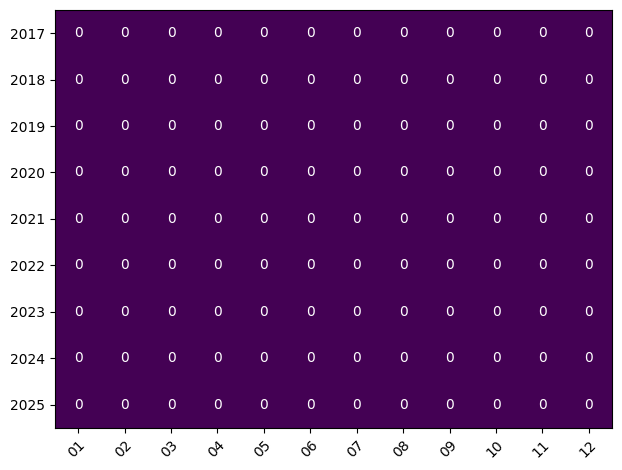

In [116]:
# number of days that have all channels available for all cells

for y in years:
    print(f"{y} => {" | ".join([f"{m}:{len({d for d,v in date_coverage[y].get(m, {}).items() if {ki for ki,vi in v.items() if vi == bands} == cells}):2}" for m in months])}")

coverage = np.array([[len({d for d,v in date_coverage[y].get(m, {}).items() if {ki for ki,vi in v.items() if vi == bands} == cells}) for m in months] for y in years])

fig, ax = plt.subplots()
im = ax.imshow(coverage)

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(len(months)), labels=months, rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(years)), labels=years)

# Loop over data dimensions and create text annotations.
for i in range(len(years)):
    for j in range(len(months)):
        text = ax.text(j, i, coverage[i, j], ha="center", va="center", color="w")

fig.tight_layout()
plt.show()


2017 => 01: 0 | 02: 0 | 03: 0 | 04:29 | 05:27 | 06:30 | 07:30 | 08:31 | 09:29 | 10:31 | 11:30 | 12:30
2018 => 01:31 | 02:27 | 03:31 | 04:30 | 05:30 | 06:30 | 07:31 | 08:30 | 09:27 | 10:31 | 11:29 | 12:30
2019 => 01:31 | 02:25 | 03:30 | 04:27 | 05:30 | 06:29 | 07:26 | 08:27 | 09:28 | 10:31 | 11:29 | 12:31
2020 => 01:31 | 02:27 | 03:31 | 04:29 | 05:31 | 06:28 | 07:30 | 08:30 | 09:30 | 10:31 | 11:28 | 12:29
2021 => 01:30 | 02:26 | 03:27 | 04: 7 | 05: 7 | 06: 4 | 07:16 | 08: 6 | 09: 9 | 10:25 | 11:25 | 12:18
2022 => 01:11 | 02: 6 | 03: 3 | 04: 3 | 05: 0 | 06: 0 | 07: 3 | 08: 0 | 09: 0 | 10:23 | 11: 0 | 12: 0
2023 => 01: 0 | 02: 0 | 03: 0 | 04: 0 | 05: 0 | 06: 0 | 07: 0 | 08: 0 | 09: 0 | 10: 0 | 11: 0 | 12: 0
2024 => 01: 0 | 02: 0 | 03: 0 | 04: 0 | 05: 0 | 06: 0 | 07: 0 | 08: 0 | 09: 0 | 10: 0 | 11: 0 | 12: 0
2025 => 01: 0 | 02: 0 | 03: 0 | 04: 0 | 05: 0 | 06: 0 | 07: 0 | 08: 0 | 09: 0 | 10: 0 | 11: 0 | 12: 0


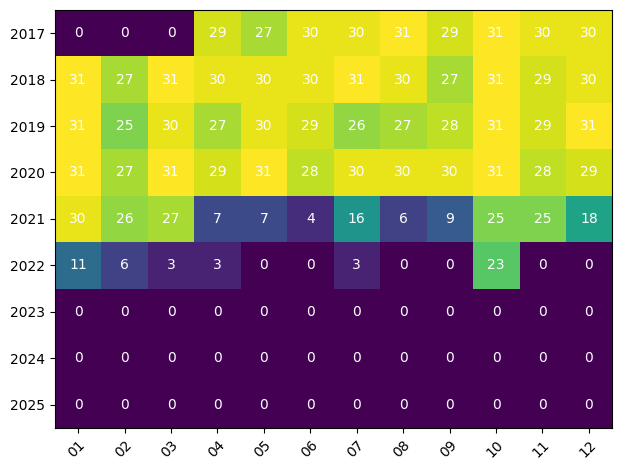

In [117]:
# number of days that have all channels available for at least one cell

for y in years:
    print(f"{y} => {" | ".join([f"{m}:{len({d for d,v in date_coverage[y].get(m, {}).items() if len({ki for ki,vi in v.items() if vi == bands}) > 0}):2}" for m in months])}")

coverage = np.array([[len({d for d,v in date_coverage[y].get(m, {}).items() if len({ki for ki,vi in v.items() if vi == bands}) > 0}) for m in months] for y in years])

fig, ax = plt.subplots()
im = ax.imshow(coverage)

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(len(months)), labels=months, rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(years)), labels=years)

# Loop over data dimensions and create text annotations.
for i in range(len(years)):
    for j in range(len(months)):
        text = ax.text(j, i, coverage[i, j], ha="center", va="center", color="w")

fig.tight_layout()
plt.show()


2017 => 01: 0 | 02: 0 | 03: 0 | 04:29 | 05:27 | 06:30 | 07:30 | 08:31 | 09:29 | 10:31 | 11:30 | 12:30
2018 => 01:31 | 02:27 | 03:31 | 04:30 | 05:30 | 06:30 | 07:31 | 08:30 | 09:29 | 10:31 | 11:30 | 12:30
2019 => 01:31 | 02:28 | 03:31 | 04:30 | 05:30 | 06:29 | 07:27 | 08:27 | 09:29 | 10:31 | 11:29 | 12:31
2020 => 01:31 | 02:27 | 03:31 | 04:29 | 05:31 | 06:28 | 07:30 | 08:31 | 09:30 | 10:31 | 11:28 | 12:29
2021 => 01:31 | 02:28 | 03:29 | 04:11 | 05:18 | 06:17 | 07:19 | 08:12 | 09:12 | 10:26 | 11:25 | 12:21
2022 => 01:15 | 02:21 | 03:18 | 04:28 | 05: 6 | 06: 9 | 07:30 | 08:10 | 09:14 | 10:31 | 11:30 | 12:27
2023 => 01:21 | 02: 6 | 03: 3 | 04:25 | 05:19 | 06:12 | 07:30 | 08:29 | 09:30 | 10:12 | 11:12 | 12: 7
2024 => 01: 4 | 02: 1 | 03: 7 | 04:10 | 05:20 | 06:13 | 07: 5 | 08: 7 | 09:14 | 10:14 | 11: 2 | 12: 2
2025 => 01:29 | 02:28 | 03: 6 | 04: 0 | 05: 0 | 06: 0 | 07: 0 | 08: 0 | 09: 0 | 10: 0 | 11: 0 | 12: 0


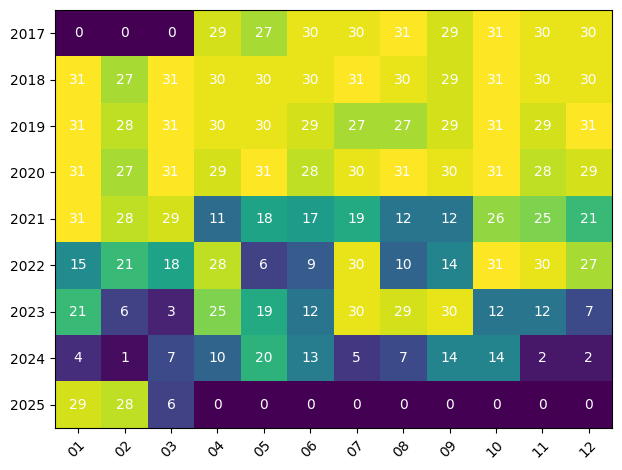

In [118]:
# number of days that have at least one channel available for at least one cell

for y in years:
    print(f"{y} => {" | ".join([f"{m}:{len({d for d,v in date_coverage[y].get(m, {}).items()}):2}" for m in months])}")

coverage = np.array([[len({d for d,v in date_coverage[y].get(m, {}).items()}) for m in months] for y in years])

fig, ax = plt.subplots()
im = ax.imshow(coverage)

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(len(months)), labels=months, rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(years)), labels=years)

# Loop over data dimensions and create text annotations.
for i in range(len(years)):
    for j in range(len(months)):
        text = ax.text(j, i, coverage[i, j], ha="center", va="center", color="w")

fig.tight_layout()
plt.show()


2017 => 01:  0 | 02:  0 | 03:  0 | 04: 85 | 05: 80 | 06: 78 | 07: 82 | 08: 80 | 09: 74 | 10: 85 | 11: 82 | 12: 83
2018 => 01: 87 | 02: 72 | 03: 88 | 04: 72 | 05: 78 | 06: 86 | 07: 76 | 08: 82 | 09: 67 | 10: 80 | 11: 79 | 12: 88
2019 => 01: 90 | 02: 69 | 03: 94 | 04: 68 | 05: 70 | 06: 72 | 07: 44 | 08: 57 | 09: 71 | 10: 70 | 11: 66 | 12: 85
2020 => 01: 72 | 02: 64 | 03: 70 | 04: 66 | 05: 73 | 06: 63 | 07: 61 | 08: 71 | 09: 62 | 10: 84 | 11: 63 | 12: 60
2021 => 01: 70 | 02: 53 | 03: 46 | 04:  7 | 05: 11 | 06: 11 | 07: 14 | 08: 10 | 09:  7 | 10: 46 | 11: 25 | 12: 19
2022 => 01: 17 | 02:  9 | 03: 15 | 04: 31 | 05:  2 | 06:  2 | 07: 29 | 08:  5 | 09:  5 | 10: 72 | 11: 23 | 12: 16
2023 => 01: 10 | 02:  2 | 03:  1 | 04: 14 | 05:  8 | 06:  6 | 07: 42 | 08: 37 | 09: 40 | 10:  2 | 11:  1 | 12:  1
2024 => 01:  0 | 02:  0 | 03:  3 | 04:  8 | 05:  8 | 06:  7 | 07:  0 | 08:  2 | 09:  7 | 10:  8 | 11:  0 | 12:  0
2025 => 01: 38 | 02: 35 | 03:  6 | 04:  0 | 05:  0 | 06:  0 | 07:  0 | 08:  0 | 09:  0 |

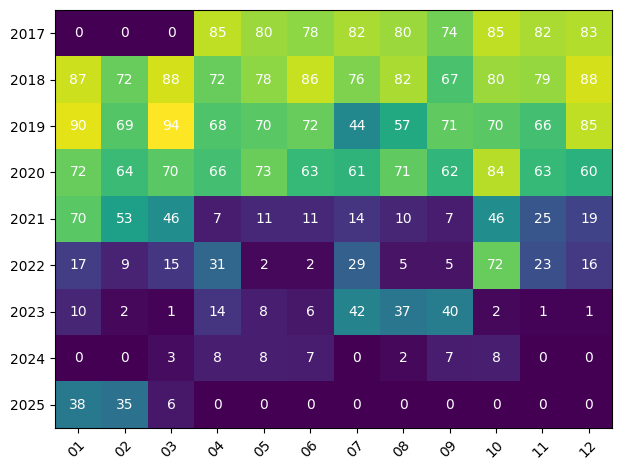

In [119]:
# rough guesstimate as to how full months are - assuming each day gets 1 set of files (12 cells, 5 bands), and a month has 30 days

for y in years:
    print(f"{y} => {" | ".join([f"{m}:{int(sum([sum([len(vi) for vi in v.values()]) for d,v in date_coverage[y].get(m, {}).items()])/30/12/5*100):3}" for m in months])}")

coverage = np.array([[int(sum([sum([len(vi) for vi in v.values()]) for d,v in date_coverage[y].get(m, {}).items()])/30/12/5*100) for m in months] for y in years])

fig, ax = plt.subplots()
im = ax.imshow(coverage)

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(len(months)), labels=months, rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(years)), labels=years)

# Loop over data dimensions and create text annotations.
for i in range(len(years)):
    for j in range(len(months)):
        text = ax.text(j, i, coverage[i, j], ha="center", va="center", color="w")

fig.tight_layout()
plt.show()
